## **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

## **Curso: TC4029 - Ciencia y analítica de datos**

## Tecnológico de Monterrey

## Prof Grettel Barceló Alonso

## **Semana 6**
## Ingeniería de características (FE)

---


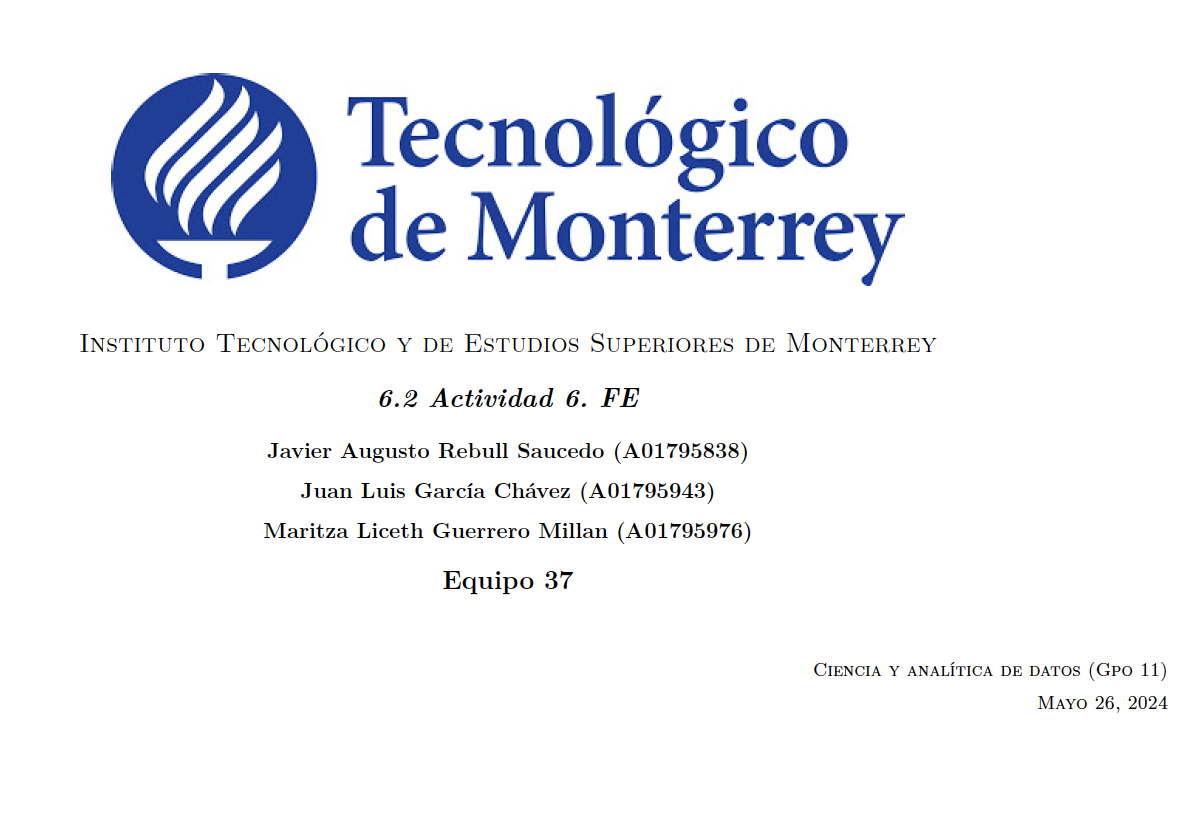

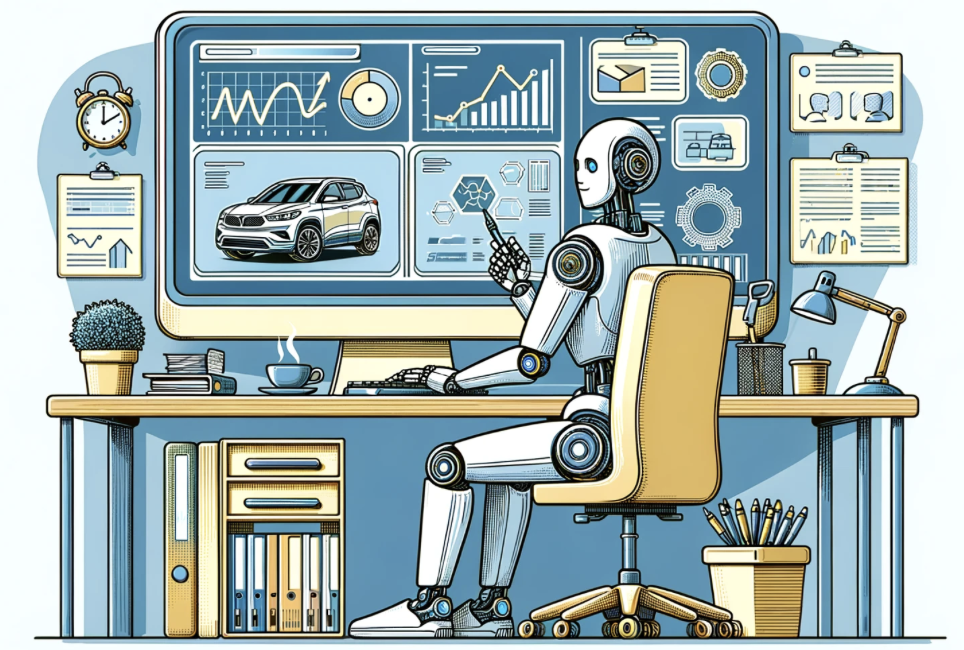

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Actividad6_FE"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
!pip install category_encoders

In [5]:
from IPython.display import display, HTML
import locale
from datetime import datetime
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Configurar el formato de los números
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [6]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [7]:
# Crear una muestra aleatoria de 1000 registros
#cars_df = cars_df.sample(n=50000, random_state=1)

# Mostrar los primeros registros de la muestra
#cars_df.head()

# Asignar cars_df a cars_df
#cars_df = cars_df

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

### 1a) Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.

In [9]:
# Verificar si hay columnas a eliminar
columnas_a_eliminar = [
    "id",
    "VIN",
    "url",
    "image_url",
    "description",
    "posting_date",
    "lat",
    "long",
]
columnas_existentes_a_eliminar = [
    col for col in columnas_a_eliminar if col in cars_df.columns
]

if columnas_existentes_a_eliminar:
    # Mensaje de éxito
    display(HTML("<span style='color: green; font-size: 17px; font-weight: bold;'>Columnas eliminadas con éxito!!!</span><br><br>"))

    # Mostrar información del DataFrame original
    columnas_originales = cars_df.columns
    columnas_totales_originales = len(columnas_originales)

    # Eliminar las columnas no relevantes
    tipos_columnas_eliminadas = cars_df[columnas_existentes_a_eliminar].dtypes
    cars_df.drop(columns=columnas_existentes_a_eliminar, inplace=True)

    # Mostrar información del DataFrame modificado
    columnas_modificadas = cars_df.columns
    columnas_totales_modificadas = len(columnas_modificadas)

    # Formatear la salida
    output_html = f"""
    <div style='color: lightblue; font-size: 17px;'>Data Frame Original = Columnas totales: {columnas_totales_originales}</div><br>
    <div style='color: lightblue; font-size: 17px;'>Data Frame Modificado = Columnas totales: {columnas_totales_modificadas}</div><br>
    <br>
    <div style='color: darkorange; font-size: 17px;'>Columnas eliminadas y sus tipos:</div><br>
    <table style='font-size: 17px;'>
        <tr><th style='text-align: left; color: lightcoral;'>#</th><th style='text-align: left; color: lightcoral;'>Columna</th><th style='text-align: left; color: lightcoral;'>Tipo</th></tr>
    """

    for i, (col, dtype) in enumerate(tipos_columnas_eliminadas.items(), start=1):
        output_html += f"<tr><td style='color: lightcoral;'>{i}</td><td style='color: lightcoral;'>{col}</td><td style='color: lightcoral;'>{dtype}</td></tr><tr><td></td><td></td><td></td></tr>"

    output_html += "</table><br><br><div style='color: darkorange; font-size: 17px;'>Columnas restantes y sus tipos:</div><br><table style='font-size: 17px;'>"
    output_html += "<tr><th style='text-align: left; color: lightgreen;'>#</th><th style='text-align: left; color: lightgreen;'>Columna</th><th style='text-align: left; color: lightgreen;'>Tipo</th></tr>"

    for i, col in enumerate(cars_df.columns, start=1):
        output_html += f"<tr><td style='color: lightgreen;'>{i}</td><td style='color: lightgreen;'>{col}</td><td style='color: lightgreen;'>{cars_df[col].dtype}</td></tr><tr><td></td><td></td><td></td></tr>"

    output_html += "</table>"

    display(HTML(output_html))
else:
    display(HTML("<span style='color: lightcoral; font-size: 17px; font-weight: bold;'>NO HAY COLUMNAS A ELIMINAR</span>"))

#,Columna,Tipo
1,id,int64
,,
2,VIN,object
,,
3,url,object
,,
4,image_url,object
,,
5,description,object
,,


## 1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [10]:
# Configurar el formato de los números
locale.setlocale(locale.LC_ALL, "")

# Almacenar la cantidad de observaciones o registros
cantidadObservacionesDfVehicles = len(cars_df)

# Almacenar el número de columnas después del borrado
numeroColumnasDfVehicles = cars_df.shape[1]

# Verificar el almacenamiento y mostrar el mensaje correspondiente
if cantidadObservacionesDfVehicles and numeroColumnasDfVehicles:
    mensaje = "<span style='color: green; font-size: 18px; font-weight: bold;'>INFORMACIÓN ALMACENADA CON ÉXITO</span><br><br>"
    mensaje += f"<div style='font-size: 18px;'>Cantidad de Observaciones: {locale.format_string('%d', cantidadObservacionesDfVehicles, grouping=True)}</div>"
    mensaje += f"<div style='color: lightblue; font-size: 18px;'>La variable se llama cantidadObservacionesDfVehicles</div><br>"
    mensaje += f"<div style='font-size: 18px;'>Número de Columnas: {locale.format_string('%d', numeroColumnasDfVehicles, grouping=True)}</div>"
    mensaje += f"<div style='color: lightblue; font-size: 18px;'>La variable se llama numeroColumnasDfVehicles</div>"
else:
    mensaje = "<span style='color: red; font-size: 18px; font-weight: bold;'>ERROR AL ALMACENAR LA INFORMACIÓN</span>"

display(HTML(mensaje))

# **Valores faltantes**

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

### 2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()`. ¿Cuántas columnas se eliminaron?


In [11]:
# Calcular el umbral de valores no nulos (70% del total de registros)
umbralNoNulos = 0.70 * len(cars_df)

# Calcular el porcentaje de valores no nulos por columna
porcentajeNoNulos = cars_df.count() / len(cars_df)

# Número de columnas antes de eliminar
columnasAntes = cars_df.shape[1]

# Usar el parámetro 'thresh' de la función dropna() para eliminar las columnas con menos del 70% de valores no nulos
cars_df.dropna(axis=1, thresh=umbralNoNulos, inplace=True)

# Número de columnas después de eliminar
columnasDespues = cars_df.shape[1]

# Calcular el número de columnas eliminadas
columnasEliminadasPorFaltantes = columnasAntes - columnasDespues

# Mensaje según el resultado
if columnasEliminadasPorFaltantes > 0:
    mensaje = f"<span style='color: green; font-size: 18px; font-weight: bold;'>SE ELIMINARON {columnasEliminadasPorFaltantes} COLUMNAS</span><br><br>"
else:
    mensaje = "<span style='color: lightcoral; font-size: 18px; font-weight: bold;'>NO SE ELIMINARON COLUMNAS</span><br><br>"

# Formatear la salida
mensaje += f"<div style='color: lightblue; font-size: 18px;'>Número de Columnas Originales: {locale.format_string('%d', columnasAntes, grouping=True)}</div>"
mensaje += f"<div style='color: lightblue; font-size: 18px;'>Número de Columnas Restantes: {locale.format_string('%d', columnasDespues, grouping=True)}</div>"

# Calcular el porcentaje de valores nulos por columna
porcentajeNulos = 1 - porcentajeNoNulos

# Crear un DataFrame temporal para ordenar los porcentajes
dfPorcentajes = porcentajeNoNulos.to_frame(name='%ValoresNoNulos')
dfPorcentajes['%ValoresNulos'] = porcentajeNulos
dfPorcentajes['SeVaAEliminar'] = ['No' if col in cars_df.columns else 'Sí' for col in dfPorcentajes.index]
dfPorcentajes = dfPorcentajes.sort_values(by='%ValoresNulos', ascending=False)

# Crear tabla de porcentajes
tablaPorcentajes = "<table style='font-size: 18px;'><tr><th style='color: orangered; text-align: left;'>#</th><th style='color: orangered; text-align: left;'>Columna</th><th style='color: orangered; padding-right: 30px; text-align: right;'>% Valores No Nulos</th><th style='color: orangered; padding-right: 30px; text-align: right;'>% Valores Nulos</th><th style='color: orangered; text-align: center;'>Se Va A Eliminar</th></tr>"
for i, (col, row) in enumerate(dfPorcentajes.iterrows(), start=1):
    valNoNulos = f"{row['%ValoresNoNulos']*100:.2f}%" if row['%ValoresNoNulos'] < 1 else "100%"
    valNulos = f"{row['%ValoresNulos']*100:.2f}%" if row['%ValoresNulos'] < 1 else "100%"
    colorFila = 'lightcoral' if row['SeVaAEliminar'] == 'Sí' else 'lightgreen'
    tablaPorcentajes += f"<tr style='color: {colorFila};'><td>{i}</td><td>{col}</td><td style='padding-right: 30px; text-align: right;'>{valNoNulos}</td><td style='padding-left: 30px; text-align: right;'>{valNulos}</td><td style='text-align: center;'>{row['SeVaAEliminar']}</td></tr>"
tablaPorcentajes += "</table>"

mensaje += f"<br>{tablaPorcentajes}"

display(HTML(mensaje))

#,Columna,% Valores No Nulos,% Valores Nulos,Se Va A Eliminar
1,county,0.00%,100%,Sí
2,size,28.23%,71.77%,Sí
3,cylinders,58.38%,41.62%,Sí
4,condition,59.21%,40.79%,Sí
5,drive,69.41%,30.59%,Sí
6,paint_color,69.50%,30.50%,Sí
7,type,78.25%,21.75%,No
8,manufacturer,95.87%,4.13%,No
9,title_status,98.07%,1.93%,No
10,model,98.76%,1.24%,No


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

In [12]:
# Definir los valores faltantes personalizados
missing_values = ["n/a", "na", " _ _"]

# Reemplazar los valores faltantes personalizados por NaN
cars_df.replace(missing_values, pd.NA, inplace=True)

# Calcular el porcentaje de valores faltantes personalizados por columna
porcentajeValoresFaltantesPersonalizados = cars_df.isna().mean() * 100

# Crear un DataFrame temporal para ordenar los porcentajes
dfPorcentajesFaltantes = porcentajeValoresFaltantesPersonalizados.to_frame(name='%ValoresFaltantesPersonalizados')
dfPorcentajesFaltantes = dfPorcentajesFaltantes.sort_values(by='%ValoresFaltantesPersonalizados', ascending=False)

# Crear una tabla con los porcentajes
tablaPorcentajesFaltantes = "<table style='font-size: 18px;'><tr><th style='color: darkorange; text-align: left;'>#</th><th style='color: darkorange; text-align: left;'>Columna</th><th style='color: darkorange; text-align: right;'>% Valores Faltantes Personalizados</th></tr>"
for i, (col, row) in enumerate(dfPorcentajesFaltantes.iterrows(), start=1):
    tablaPorcentajesFaltantes += f"<tr><td>{i}</td><td>{col}</td><td style='padding-right: 30px; text-align: right;'>{row['%ValoresFaltantesPersonalizados']:.2f}%</td></tr>"
tablaPorcentajesFaltantes += "</table>"

# Formatear y mostrar el mensaje
mensaje = f"<br>{tablaPorcentajesFaltantes}"
display(HTML(mensaje))

# Imprimir una muestra de 5 filas que contengan los valores faltantes personalizados
# Identificar las filas que contienen los valores faltantes personalizados
filasConValoresFaltantesPersonalizados = cars_df[cars_df.isin([pd.NA])].dropna(how='all')

if not filasConValoresFaltantesPersonalizados.empty:
    sampleValoresFaltantes = filasConValoresFaltantesPersonalizados.sample(min(5, len(filasConValoresFaltantesPersonalizados)))
    display(sampleValoresFaltantes)
else:
    display(HTML("<span style='color: red; font-size: 18px;'>No hay filas con valores faltantes personalizados para mostrar.</span>"))

# Imprimir un sample de la columna 'type' que contiene valores personalizados
if 'type' in cars_df.columns:
    sampleTypeColumna = cars_df[cars_df['type'].isna()].sample(min(5, cars_df['type'].isna().sum()))
    display(sampleTypeColumna)
else:
    display(HTML("<span style='color: red; font-size: 18px;'>La columna 'type' no está presente en el DataFrame.</span>"))

#,Columna,% Valores Faltantes Personalizados
1,type,21.75%
2,manufacturer,4.13%
3,title_status,1.93%
4,model,1.24%
5,odometer,1.03%
6,fuel,0.71%
7,transmission,0.60%
8,year,0.28%
9,region,0.00%
10,region_url,0.00%


,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
119377,treasure coast,https://treasure.craigslist.org,3500,2010.0,volvo,s40,gas,109000.0,clean,manual,NaN,fl
283190,new hampshire,https://nh.craigslist.org,6000,2002.0,toyota,camry,gas,95000.0,clean,automatic,NaN,nh
145271,rockford,https://rockford.craigslist.org,6250,2005.0,mercury,mariner,gas,114445.0,clean,automatic,NaN,il
96906,gainesville,https://gainesville.craigslist.org,42900,2011.0,ford,f250,diesel,109000.0,clean,automatic,NaN,fl
350206,myrtle beach,https://myrtlebeach.craigslist.org,30000,2019.0,honda,cr-v,gas,9011.0,clean,automatic,NaN,sc


### 2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset. ¿Qué porcentaje de los registros iniciales se eliminaron?

In [13]:
# Calcular el porcentaje de valores faltantes por columna
porcentajeFaltantes = cars_df.isna().mean()

# Identificar las columnas con menos del 5% de valores faltantes
columnasMenos5PorcientoFaltantes = porcentajeFaltantes[porcentajeFaltantes < 0.05].index.tolist()

# Número de registros antes de eliminar
registrosAntes = len(cars_df)

# Borrar los registros que contengan NaN en las columnas con menos del 5% de valores faltantes
registrosEliminados = cars_df[cars_df[columnasMenos5PorcientoFaltantes].isna().any(axis=1)]
cars_df.dropna(subset=columnasMenos5PorcientoFaltantes, inplace=True)

# Número de registros después de eliminar
registrosDespues = len(cars_df)

# Calcular el porcentaje de registros eliminados
porcentajeRegistrosEliminados = ((registrosAntes - registrosDespues) / registrosAntes) * 100

# Mensaje según el resultado
if porcentajeRegistrosEliminados > 0:
    mensaje = f"<span style='color: green; font-size: 18px; font-weight: bold;'>SE ELIMINARON REGISTROS</span><br><br>"
    mensaje += f"<div style='font-size: 18px;'>Porcentaje de registros eliminados: {porcentajeRegistrosEliminados:.2f}%</div><br>"
    mensaje += f"<div style='color: darkblue; font-size: 18px;'>Número de registros iniciales: {locale.format_string('%d', registrosAntes, grouping=True)}</div><br>"
    mensaje += f"<div style='color: darkblue; font-size: 18px;'>Número de registros restantes: {locale.format_string('%d', registrosDespues, grouping=True)}</div><br>"
else:
    mensaje = "<span style='color: red; font-size: 18px; font-weight: bold;'>NINGUN REGISTRO A ELIMINAR</span><br><br>"

display(HTML(mensaje))

# Mostrar un sample de 10 registros eliminados si hay registros eliminados
if not registrosEliminados.empty:
    sampleEliminados = registrosEliminados.sample(min(10, len(registrosEliminados)))
    display(HTML("<span style='color: red; font-size: 18px;'>Este es un sample de 10 registros eliminados:</span><br>"))
    display(sampleEliminados)

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
314705,corvallis/albany,https://corvallis.craigslist.org,12400,2013.0,ford,NaN,other,174085.0,clean,automatic,bus,or
44467,palm springs,https://palmsprings.craigslist.org,7975,2013.0,NaN,SCION TC,gas,157000.0,clean,automatic,coupe,ca
318410,eugene,https://eugene.craigslist.org,11976,2008.0,acura,mdx 4wd 4dr,NaN,156801.0,clean,automatic,SUV,or
366966,brownsville,https://brownsville.craigslist.org,9500,2007.0,NaN,isuzu npr hd,diesel,135000.0,clean,automatic,NaN,tx
292063,cincinnati,https://cincinnati.craigslist.org,10300,2014.0,dodge,avenger 4dr sdn se,NaN,54811.0,clean,automatic,sedan,oh
424681,milwaukee,https://milwaukee.craigslist.org,14999,1985.0,NaN,John Deere 510 B,diesel,6027.0,clean,other,truck,wi
299224,dayton / springfield,https://dayton.craigslist.org,4999,2009.0,nissan,altima 3.5 se 2dr coupe,gas,163370.0,NaN,automatic,coupe,oh
247686,las vegas,https://lasvegas.craigslist.org,4975,2009.0,NaN,2009 Smart Car Fortwo,gas,79000.0,clean,other,convertible,nv
103199,ocala,https://ocala.craigslist.org,35,2017.0,NaN,All tire sizes,other,1235.0,clean,other,NaN,fl
78681,fort collins / north CO,https://fortcollins.craigslist.org,2500,2002.0,saturn,NaN,gas,133235.0,clean,automatic,coupe,co


### 2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [14]:
# Identificar las columnas que aún tienen valores faltantes
columnasConFaltantes = cars_df.columns[cars_df.isna().any()].tolist()

# Mostrar las columnas que tienen valores faltantes
print("Estas columnas tienen valores faltantes y necesitan ser imputadas:")
for columna in columnasConFaltantes:
    print(columna)

Estas columnas tienen valores faltantes y necesitan ser imputadas:
type


In [15]:
# Identificar las columnas que aún tienen valores faltantes
columnasConFaltantes = cars_df.columns[cars_df.isna().any()].tolist()

# Verificar si hay columnas con valores faltantes para imputar
if columnasConFaltantes:
    # Imputar los valores faltantes con el método apropiado
    for columna in columnasConFaltantes:
        if cars_df[columna].dtype in ['int64', 'float64']:
            # Si la columna es numérica, usar la media para imputar
            valorImputacion = cars_df[columna].mean()
            cars_df[columna].fillna(valorImputacion, inplace=True)
            metodo = "Media"
            motivo = "Se utilizó la media porque es una columna numérica."
        else:
            # Si la columna es categórica, usar la moda para imputar
            valorImputacion = cars_df[columna].mode()[0]
            cars_df[columna].fillna(valorImputacion, inplace=True)
            metodo = "Moda"
            motivo = "Se utilizó la moda porque es una columna categórica."

        # Mostrar el método de imputación utilizado y el motivo
        mensaje = f"<span style='color: green; font-size: 18px;'>Se utilizó el método de {metodo} para imputar los valores faltantes en la columna '{columna}'.</span><br>"
        mensaje += f"<span style='color: darkblue; font-size: 18px;'>{motivo}</span><br>"
        display(HTML(mensaje))

        # Mostrar estadísticas de la columna imputada
        estadisticas = cars_df[columna].describe()
        mensajeEstadisticas = f"<div style='font-size: 18px;'><b>Estadísticas de la columna '{columna}':</b><br>{estadisticas.to_frame().to_html()}</div><br>"
        display(HTML(mensajeEstadisticas))

    # Mensaje final
    mensajeFinal = "<span style='color: green; font-size: 18px; font-weight: bold;'>SE COMPLETÓ LA IMPUTACIÓN DE VALORES FALTANTES</span><br><br>"
else:
    # Mensaje si no hay valores faltantes para imputar
    mensajeFinal = "<span style='color: red; font-size: 18px; font-weight: bold;'>NADA QUE COMPLETAR</span><br><br>"

display(HTML(mensajeFinal))

,type
count,389604
unique,13
top,sedan
freq,163604


# Valores atípicos

### 3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

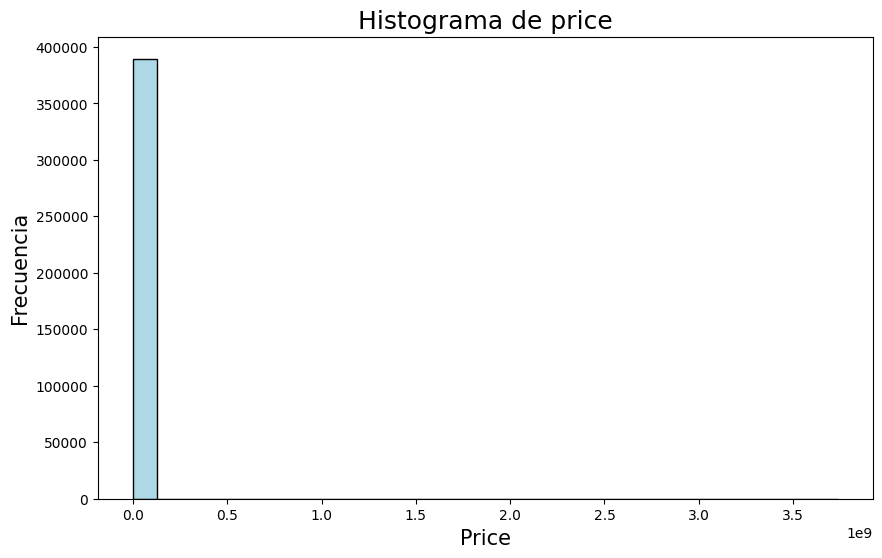

<Figure size 1000x600 with 0 Axes>

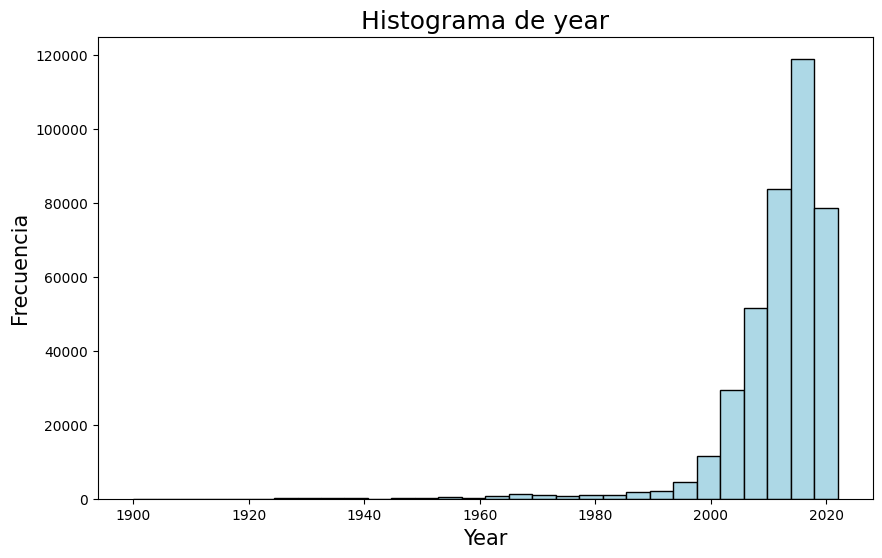

<Figure size 1000x600 with 0 Axes>

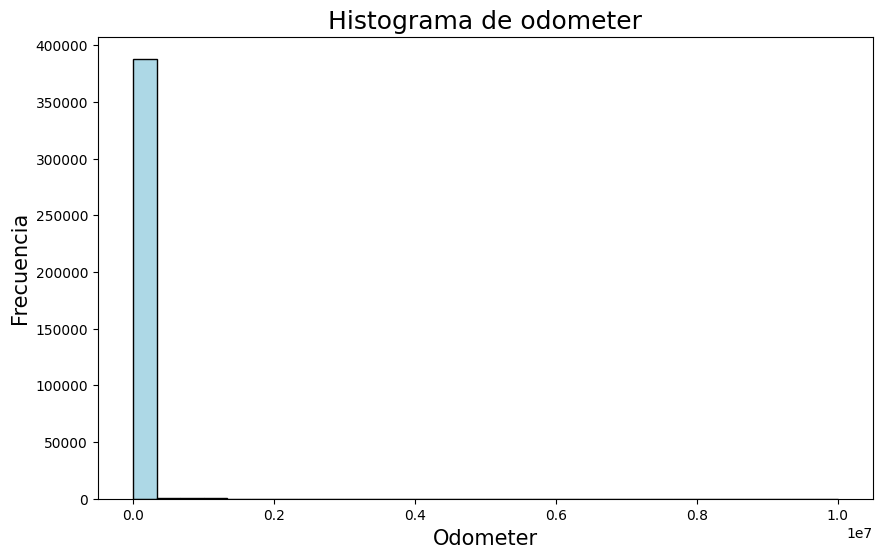

<Figure size 1000x600 with 0 Axes>

In [16]:
# Obtener el histograma de las variables 'price', 'year' y 'odometer' para observar su distribución
variables = ['price', 'year', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    cars_df[variable].hist(bins=30, edgecolor='black', color='lightblue')
    plt.title(f'Histograma de {variable}', fontsize=18)
    plt.xlabel(variable.capitalize(), fontsize=15)
    plt.ylabel('Frecuencia', fontsize=15)
    plt.grid(False)
    plt.show()
    plt.gcf().set_size_inches(10, 6)
    plt.subplots_adjust(hspace=0.5)

### 3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

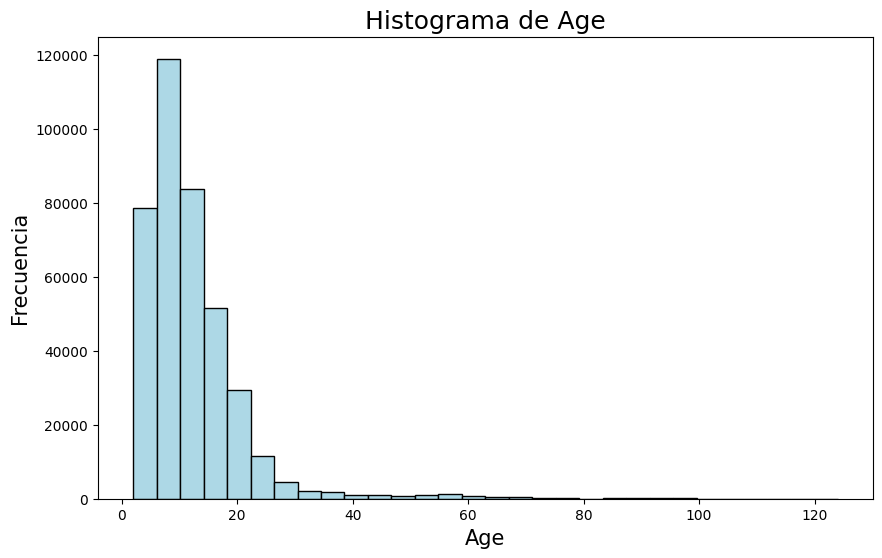

In [17]:
# Verificar si la columna 'year' existe
if 'year' in cars_df.columns:
    # Calcular la columna 'age' a partir de 'year'
    year_actual = datetime.now().year
    cars_df['age'] = year_actual - cars_df['year']

    # Eliminar la columna 'year'
    cars_df.drop(columns=['year'], inplace=True)

    # Generar el histograma de la nueva variable 'age'
    plt.figure(figsize=(10, 6))
    cars_df['age'].hist(bins=30, edgecolor='black', color='lightblue')
    plt.title('Histograma de Age', fontsize=18)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('Frecuencia', fontsize=15)
    plt.grid(False)
    plt.show()

    # Mensaje de éxito
    display(HTML("<span style='color: green; font-size: 18px; font-weight: bold;'>Columna Age Calculada con Éxito</span>"))
else:
    # Mensaje de error
    display(HTML("<span style='color: red; font-size: 18px; font-weight: bold;'>La columna 'year' no existe</span>"))

### 4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

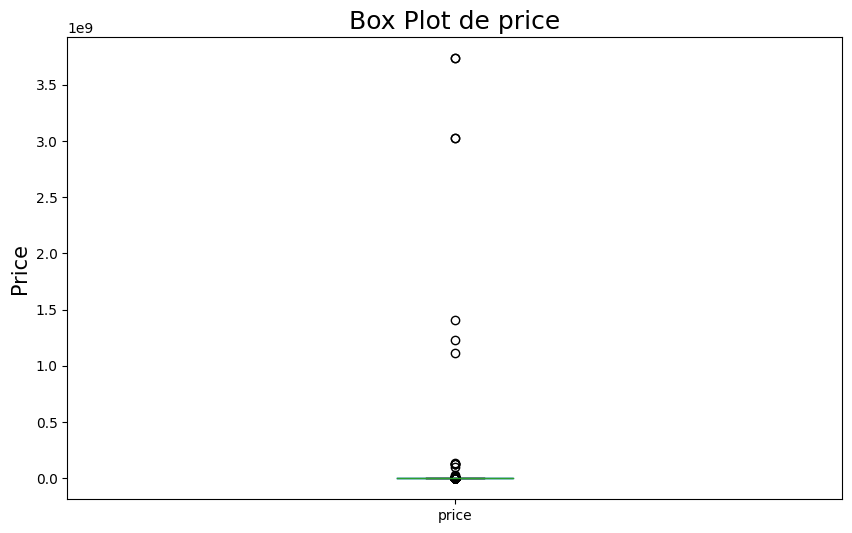

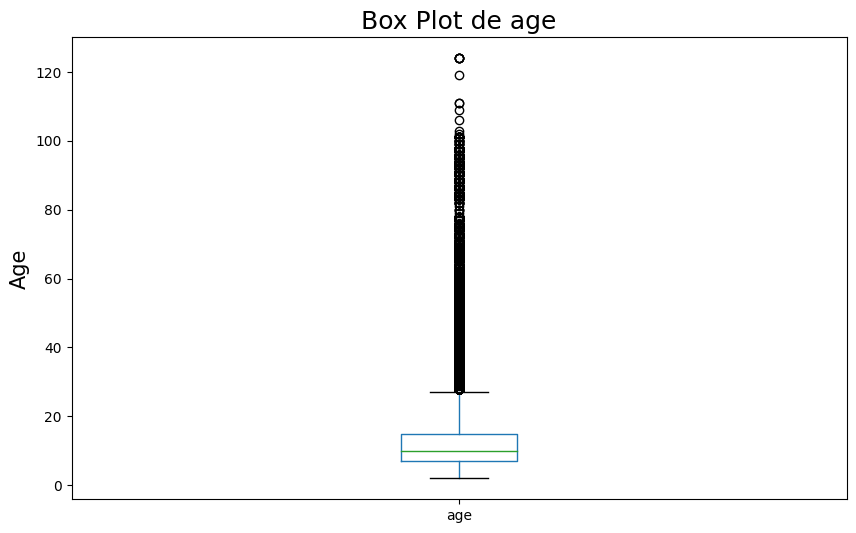

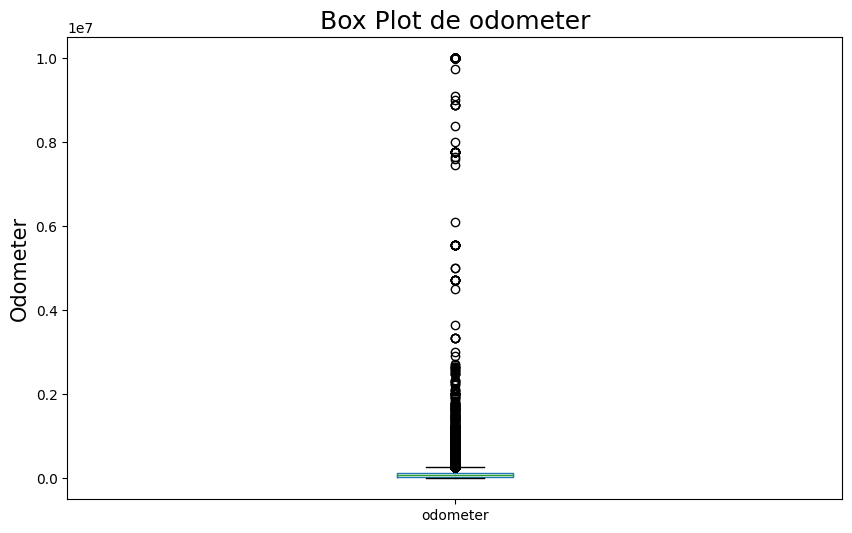

In [18]:
# Generar gráficos de box plot para las variables 'price', 'age' y 'odometer'
variables = ['price', 'age', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    cars_df.boxplot(column=variable)
    plt.title(f'Box Plot de {variable}', fontsize=18)
    plt.ylabel(variable.capitalize(), fontsize=15)
    plt.grid(False)
    plt.show()

    # Calcular los outliers
    Q1 = cars_df[variable].quantile(0.25)
    Q3 = cars_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = cars_df[(cars_df[variable] < (Q1 - 1.5 * IQR)) | (cars_df[variable] > (Q3 + 1.5 * IQR))]

    # Verificar si los outliers son relativamente grandes (alrededor del 5% del conjunto total de datos)
    porcentajeOutliers = (len(outliers) / len(cars_df)) * 100

    if porcentajeOutliers > 5:
        mensaje = f"<span style='color: red; font-size: 18px;'>El conjunto de outliers para la variable '{variable}' es relativamente grande ({porcentajeOutliers:.2f}%). Se recomienda realizar una investigación particular sobre ellos.</span><br>"
        display(HTML(mensaje))
    else:
        mensaje = f"<span style='color: green; font-size: 18px;'>Todo bien con los outliers para la variable '{variable}'.</span><br>"
        display(HTML(mensaje))

### Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

## 4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [19]:
# Calcular el porcentaje de valores atípicos para cada variable
variables = ['price', 'age', 'odometer']
resumenOutliers = []
totalOutliers = 0

for variable in variables:
    # Calcular los outliers
    Q1 = cars_df[variable].quantile(0.25)
    Q3 = cars_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = cars_df[(cars_df[variable] < (Q1 - 1.5 * IQR)) | (cars_df[variable] > (Q3 + 1.5 * IQR))]

    # Calcular el porcentaje de valores atípicos
    porcentajeOutliers = (len(outliers) / cantidadObservacionesDfVehicles) * 100
    totalOutliers += len(outliers)
    resumenOutliers.append((variable, len(outliers), porcentajeOutliers))

    # Eliminar los outliers del DataFrame
    cars_df = cars_df[~cars_df.index.isin(outliers.index)]

# Calcular el porcentaje de registros eliminados
registrosDespues = len(cars_df)
porcentajeRegistrosEliminados = ((cantidadObservacionesDfVehicles - registrosDespues) / cantidadObservacionesDfVehicles) * 100

# Crear un DataFrame para el resumen
dfResumenOutliers = pd.DataFrame(resumenOutliers, columns=['Variable', 'Total Outliers', 'Porcentaje Outliers'])

# Formatear los números
dfResumenOutliers['Total Outliers'] = dfResumenOutliers['Total Outliers'].apply(lambda x: locale.format_string("%d", x, grouping=True))
dfResumenOutliers['Porcentaje Outliers'] = dfResumenOutliers['Porcentaje Outliers'].apply(lambda x: f"{x:.2f}%")

# Mostrar el cuadro resumen
mensajeResumen = f"<div style='font-size: 18px;'><b>Resumen de Valores Atípicos:</b><br>{dfResumenOutliers.to_html(index=False)}</div><br>"

if totalOutliers > 0:
    mensajeResumen += f"<div style='color: green; font-size: 18px; font-weight: bold;'>Se eliminaron los OUTLIERS con éxito</div>"
    mensajeResumen += f"<div style='font-size: 18px;'>Porcentaje de registros eliminados: {porcentajeRegistrosEliminados:.2f}%</div>"
else:
    mensajeResumen += f"<div style='color: red; font-size: 18px; font-weight: bold;'>NO HAY OUTLIERS A ELIMINAR</div>"

display(HTML(mensajeResumen))

Variable,Total Outliers,Porcentaje Outliers
price,"6,656",1.56%
age,"11,752",2.75%
odometer,"2,763",0.65%


## 4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

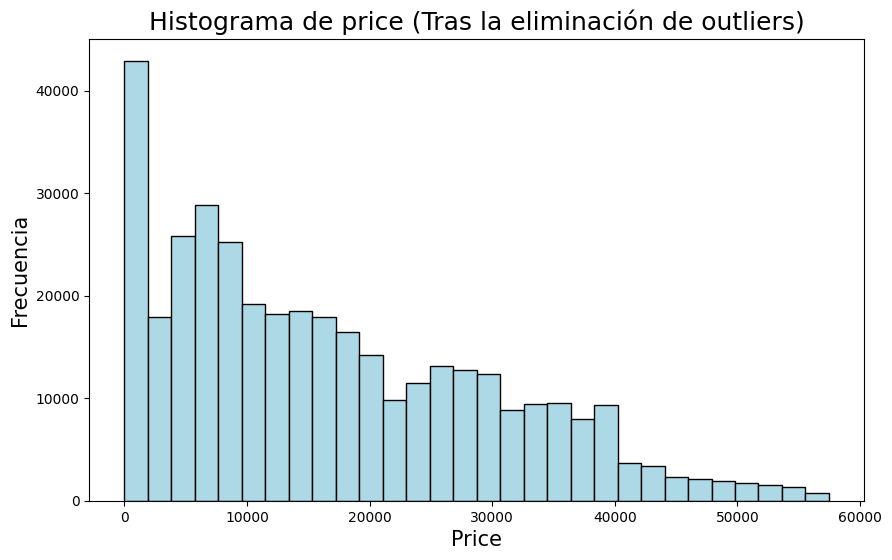

<Figure size 1000x600 with 0 Axes>

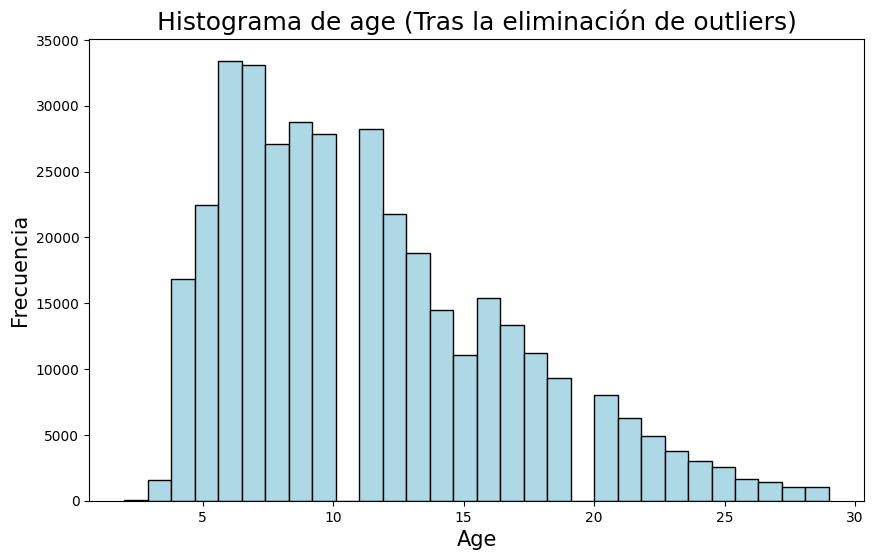

<Figure size 1000x600 with 0 Axes>

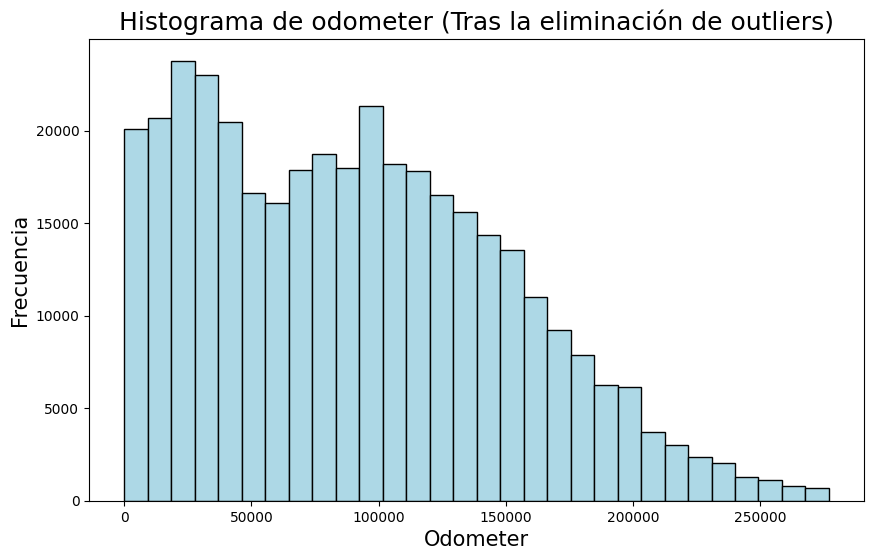

<Figure size 1000x600 with 0 Axes>

In [20]:
# Dibuja nuevamente los histogramas para observar el sesgo de las variables tras la eliminación de los outliers
variables = ['price', 'age', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    cars_df[variable].hist(bins=30, edgecolor='black', color='lightblue')
    plt.title(f'Histograma de {variable} (Tras la eliminación de outliers)', fontsize=18)
    plt.xlabel(variable.capitalize(), fontsize=15)
    plt.ylabel('Frecuencia', fontsize=15)
    plt.grid(False)
    plt.show()
    plt.gcf().set_size_inches(10, 6)
    plt.subplots_adjust(hspace=0.5)

# PARTE 2. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

### 5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.

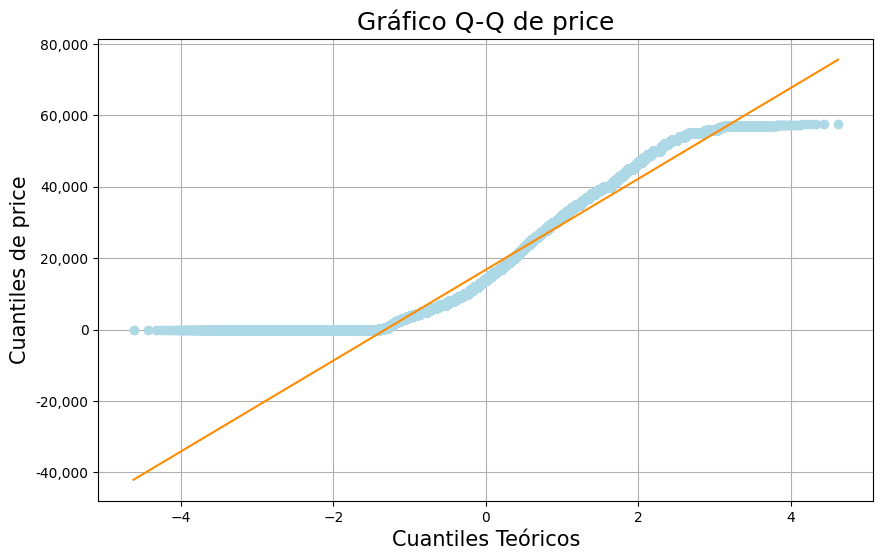

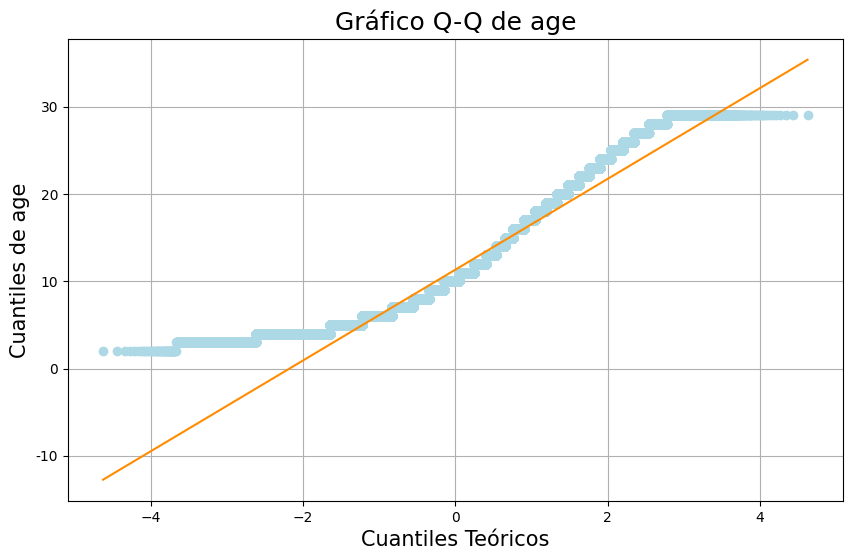

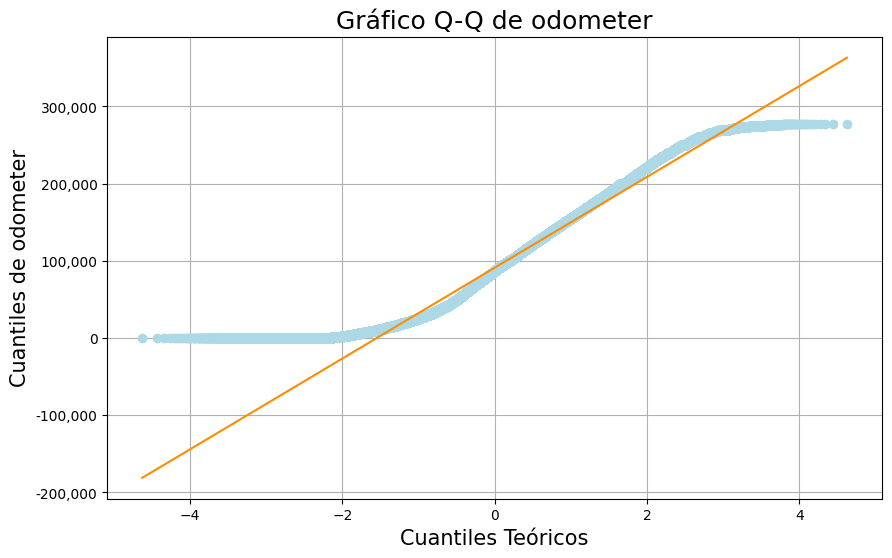

In [21]:
# Generar gráficos Q-Q de las variables 'price', 'age' y 'odometer' para observar las diferencias entre sus distribuciones y la normal
variables = ['price', 'age', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    res = stats.probplot(cars_df[variable], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {variable}', fontsize=18)
    plt.xlabel('Cuantiles Teóricos', fontsize=15)
    plt.ylabel(f'Cuantiles de {variable}', fontsize=15)
    plt.grid(True)
    plt.gca().get_lines()[0].set_color('lightblue')  # Cambiar color de los puntos a azul claro
    plt.gca().get_lines()[1].set_color('darkorange')  # Cambiar color de la línea a naranja oscuro
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
    plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

## 5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [22]:
# Crear una copia del DataFrame original
transf_df = cars_df.copy()

# Almacenar los valores originales de las columnas 'price' y 'odometer'
valoresOriginales = cars_df[['price', 'odometer']].head()

# Aplicar la transformación Yeo-Johnson para reducir el sesgo en las variables 'price' y 'odometer'
pt = PowerTransformer(method='yeo-johnson')
transf_df[['price', 'odometer']] = pt.fit_transform(transf_df[['price', 'odometer']])

# Almacenar los valores transformados
valoresTransformados = transf_df[['price', 'odometer']].head()

# Mensaje de éxito
mensajeExito = """
<span style='color: green; font-size: 18px; font-weight: bold;'>Se transformaron con éxito las columnas 'price' y 'odometer' con el método Yeo-Johnson.</span><br><br>
<span style='font-size: 18px;'>Ejemplo de valores transformados:</span><br><br><br>
"""
display(HTML(mensajeExito))

# Mostrar los valores originales y transformados
valoresComparacion = pd.concat([valoresOriginales.reset_index(drop=True), valoresTransformados.reset_index(drop=True)], axis=1)
valoresComparacion.columns = ['price_original', 'price_transformado', 'odometer_original', 'odometer_transformado']
display(valoresComparacion)

,price_original,price_transformado,odometer_original,odometer_transformado
0,33590,57923.0,1.114207,-0.378986
1,22590,71229.0,0.604847,-0.140933
2,39590,19160.0,1.351646,-1.291093
3,30990,41124.0,1.003721,-0.720236
4,15000,128000.0,0.161713,0.694327


## 5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

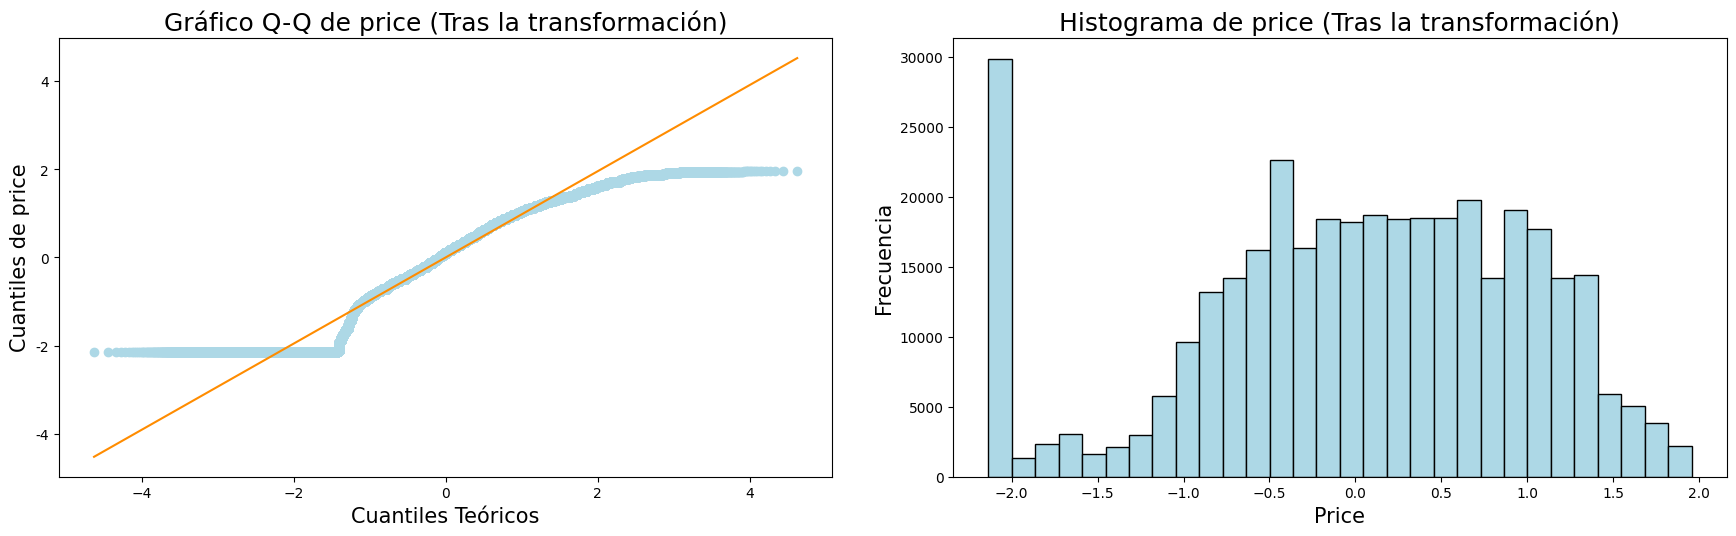

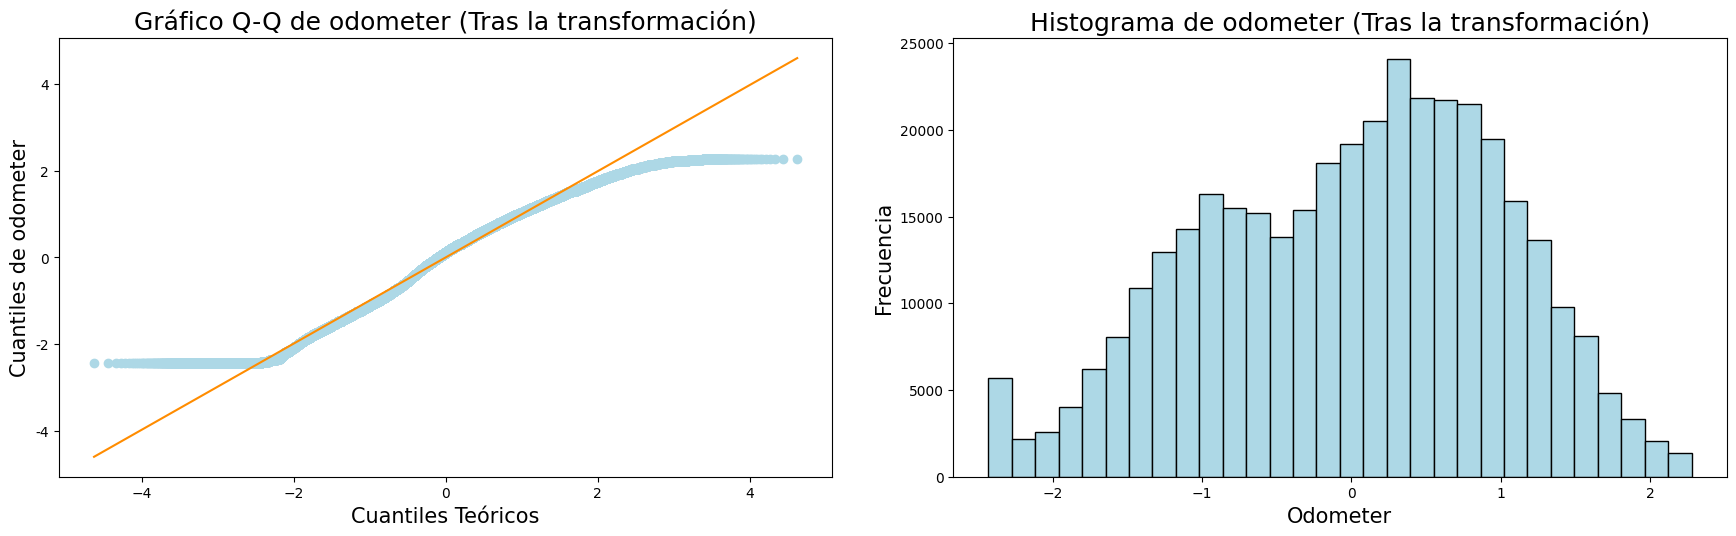

In [23]:
# Generar gráficos Q-Q y histogramas para observar el efecto de la transformación
variables = ['price', 'odometer']

for variable in variables:
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Gráfico Q-Q
    stats.probplot(transf_df[variable], dist="norm", plot=axs[0])
    axs[0].set_title(f'Gráfico Q-Q de {variable} (Tras la transformación)', fontsize=18)
    axs[0].set_xlabel('Cuantiles Teóricos', fontsize=15)
    axs[0].set_ylabel(f'Cuantiles de {variable}', fontsize=15)
    axs[0].get_lines()[0].set_color('lightblue')  # Cambiar color de los puntos a azul claro
    axs[0].get_lines()[1].set_color('darkorange')  # Cambiar color de la línea a naranja oscuro
    axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))

    # Histograma
    axs[1].hist(transf_df[variable], bins=30, edgecolor='black', color='lightblue')
    axs[1].set_title(f'Histograma de {variable} (Tras la transformación)', fontsize=18)
    axs[1].set_xlabel(variable.capitalize(), fontsize=15)
    axs[1].set_ylabel('Frecuencia', fontsize=15)
    axs[1].grid(False)

    plt.tight_layout(pad=3.0)
    plt.show()

# # Escalando variables numéricas

## 6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.

In [24]:
# Crear una copia del DataFrame transformado
minmax_df = transf_df.copy()

# Almacenar los valores originales de las columnas 'price', 'odometer' y 'age'
valoresOriginales = transf_df[['price', 'odometer', 'age']].head()

# Aplicar el método Min-Max para escalar las variables 'price', 'odometer' y 'age' al rango [0, 1]
scaler = MinMaxScaler()
minmax_df[['price', 'odometer', 'age']] = scaler.fit_transform(minmax_df[['price', 'odometer', 'age']])

# Almacenar los valores escalados
valoresEscalados = minmax_df[['price', 'odometer', 'age']].head()

# Mensaje de éxito
mensajeExito = """
<span style='color: green; font-size: 18px; font-weight: bold;'>Se ha ejecutado con éxito el método Min-Max.</span><br><br>
<span style='font-size: 18px;'>Ejemplo de valores transformados:</span><br><br><br>
"""
display(HTML(mensajeExito))

# Mostrar los valores originales y escalados juntos en columnas
valoresComparacion = pd.concat([valoresOriginales.reset_index(drop=True), valoresEscalados.reset_index(drop=True)], axis=1)
valoresComparacion.columns = ['price_original', 'price_escalado', 'odometer_original', 'odometer_escalado', 'age_original', 'age_escalado']
display(valoresComparacion)

# Mostrar los primeros registros del DataFrame escalado
display(HTML("<br><br><span style='font-size: 18px;'>Este es una muestra del DataFrame llamado minmax_df:</span>"))
display(minmax_df.head())

,price_original,price_escalado,odometer_original,odometer_escalado,age_original,age_escalado
0,1.114207,-0.378986,10.0,0.794413,0.435888,0.296296
1,0.604847,-0.140933,14.0,0.669900,0.486465,0.444444
2,1.351646,-1.291093,4.0,0.852455,0.242097,0.074074
3,1.003721,-0.720236,7.0,0.767405,0.363384,0.185185
4,0.161713,0.694327,11.0,0.561575,0.663928,0.333333


,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,0.794413,gmc,sierra 1500 crew cab slt,gas,0.435888,clean,other,pickup,al,0.296296
28,auburn,https://auburn.craigslist.org,0.669900,chevrolet,silverado 1500,gas,0.486465,clean,other,pickup,al,0.444444
29,auburn,https://auburn.craigslist.org,0.852455,chevrolet,silverado 1500 crew,gas,0.242097,clean,other,pickup,al,0.074074
30,auburn,https://auburn.craigslist.org,0.767405,toyota,tundra double cab sr,gas,0.363384,clean,other,pickup,al,0.185185
31,auburn,https://auburn.craigslist.org,0.561575,ford,f-150 xlt,gas,0.663928,clean,automatic,truck,al,0.333333


## 6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

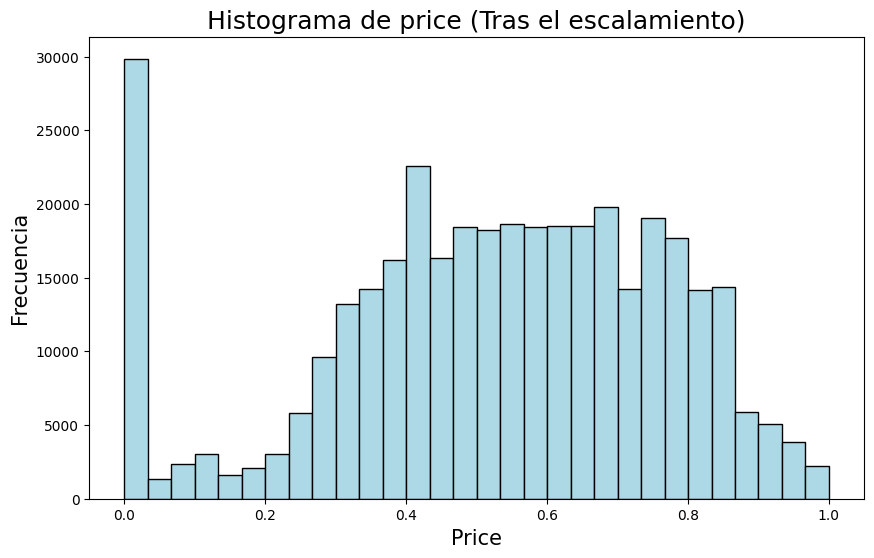

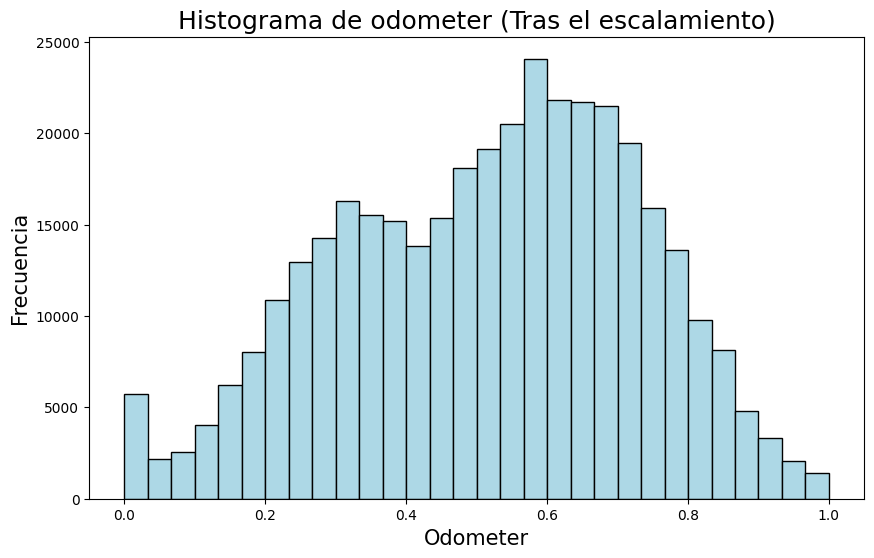

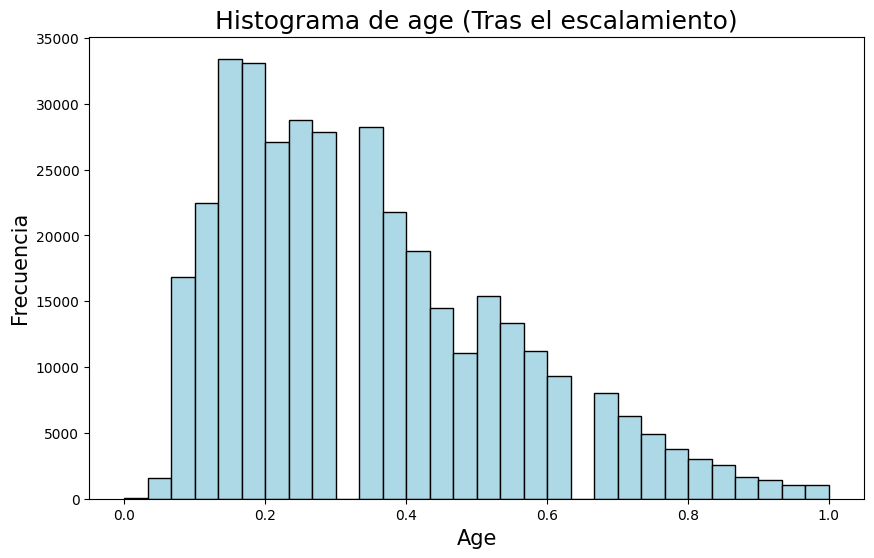

In [25]:
# Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución
variables = ['price', 'odometer', 'age']

for variable in variables:
    plt.figure(figsize=(10, 6))
    minmax_df[variable].hist(bins=30, edgecolor='black', color='lightblue')
    plt.title(f'Histograma de {variable} (Tras el escalamiento)', fontsize=18)
    plt.xlabel(variable.capitalize(), fontsize=15)
    plt.ylabel('Frecuencia', fontsize=15)
    plt.grid(False)
    plt.show()
    print("\n\n")  # Dejar dos interlineados entre cada histograma

# Codificando variables categóricas

## 7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [26]:
# Obtener el resumen de las estadísticas descriptivas en las variables categóricas
variablesCategóricas = cars_df.select_dtypes(include=['object']).columns
resumenCategóricas = cars_df[variablesCategóricas].describe()

# Mostrar el resumen
display(HTML("<span style='font-size: 18px;'>Resumen de estadísticas descriptivas en variables categóricas:</span>"))
display(resumenCategóricas)

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,368433,368433,368433,368433,368433,368433,368433,368433,368433
unique,404,413,40,19314,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3201,2745,62162,7477,313944,356757,293338,155206,42333


## 7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [27]:
# Obtener el resumen de las estadísticas descriptivas en las variables categóricas
variablesCategóricas = cars_df.select_dtypes(include=['object']).columns

# Separar en dos listas según la cardinalidad observada
highly_cardinal_variables = []
few_cardinal_variables = []

for columna in variablesCategóricas:
    unique_count = cars_df[columna].nunique()
    if unique_count >= 100:
        highly_cardinal_variables.append(columna)
    else:
        few_cardinal_variables.append(columna)

# Mostrar las listas
mensajeCardinalidad = """
<span style='font-size: 18px; color: blue;'>Variables con alta cardinalidad:</span><br>
{}<br><br>
<span style='font-size: 18px; color: blue;'>Variables con baja cardinalidad:</span><br>
{}
""".format(highly_cardinal_variables, few_cardinal_variables)
display(HTML(mensajeCardinalidad))

## 7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

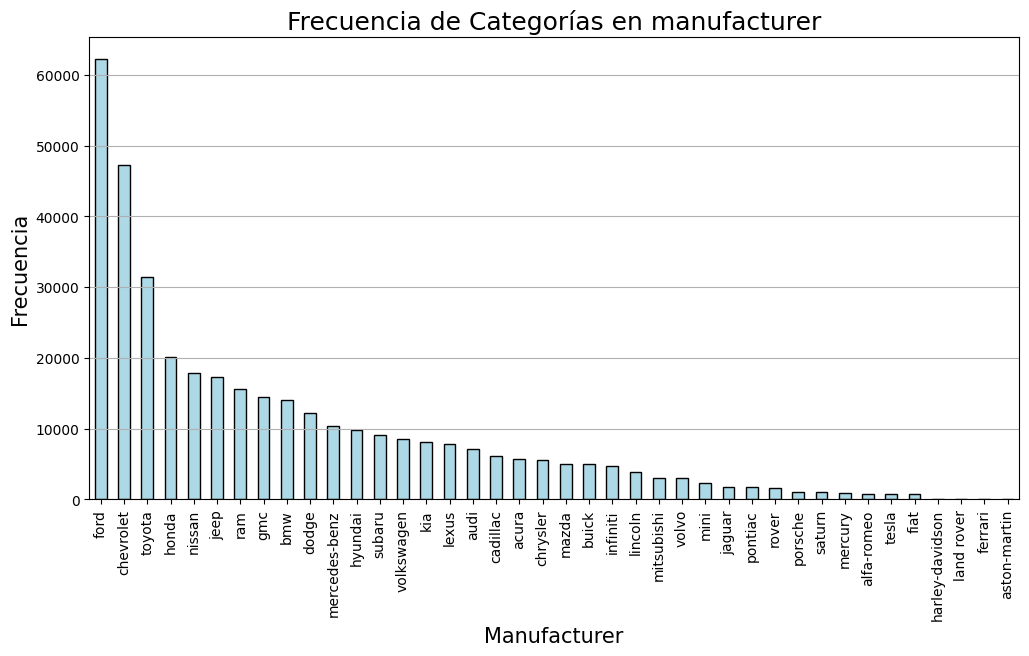

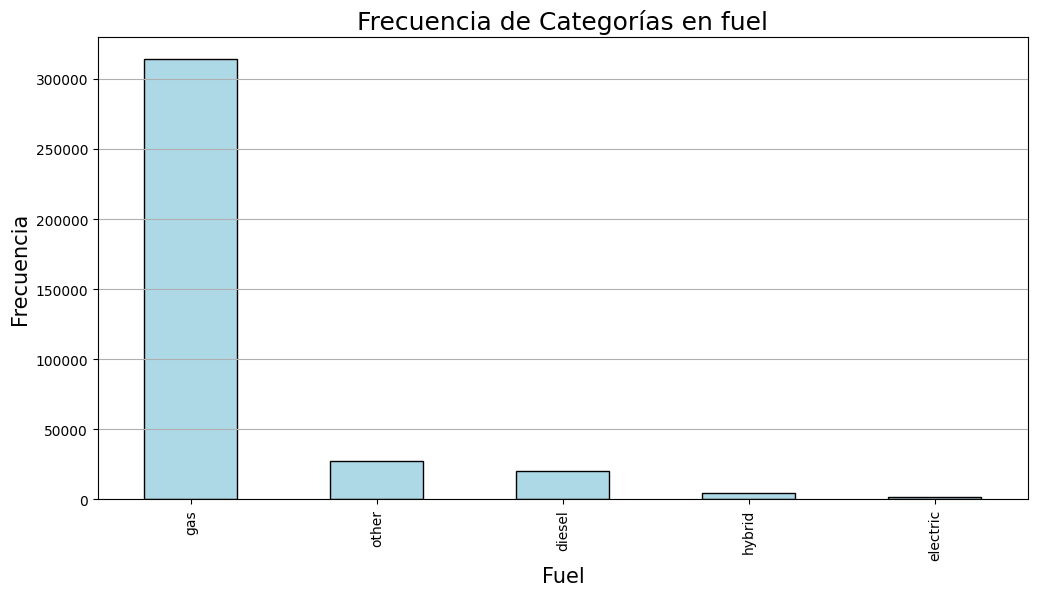

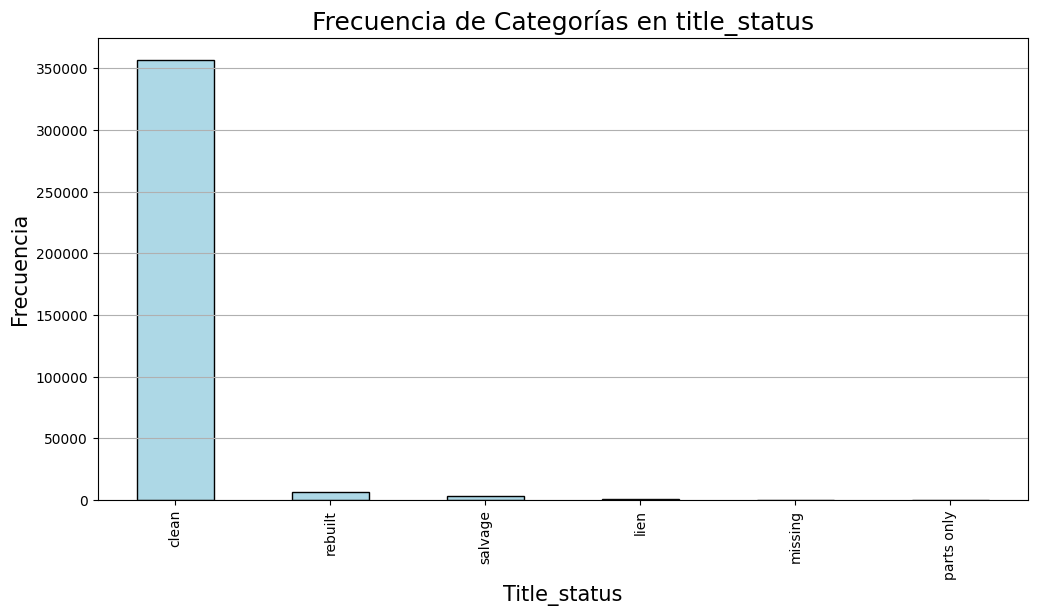

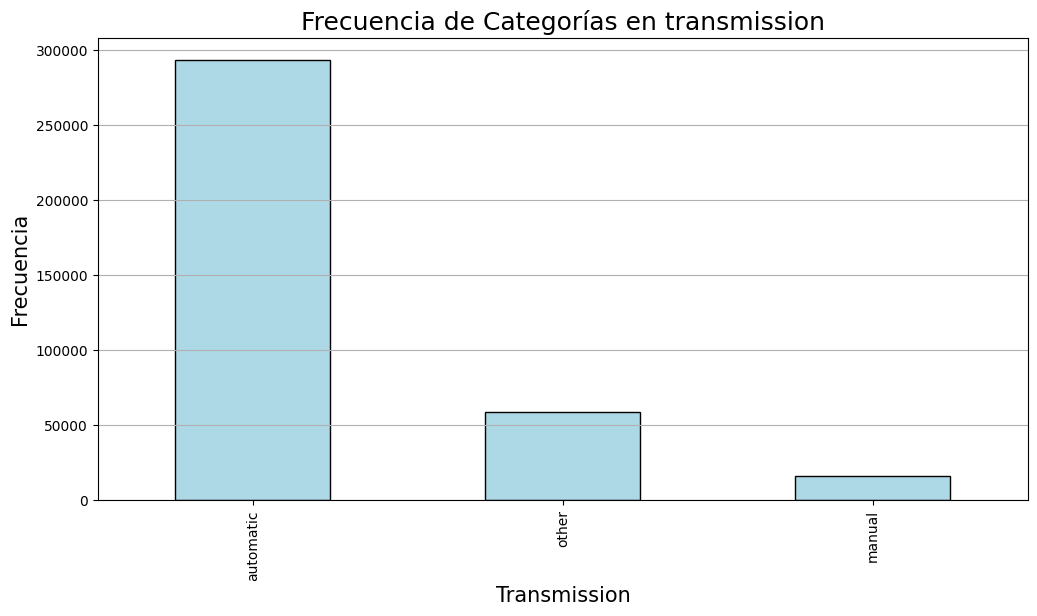

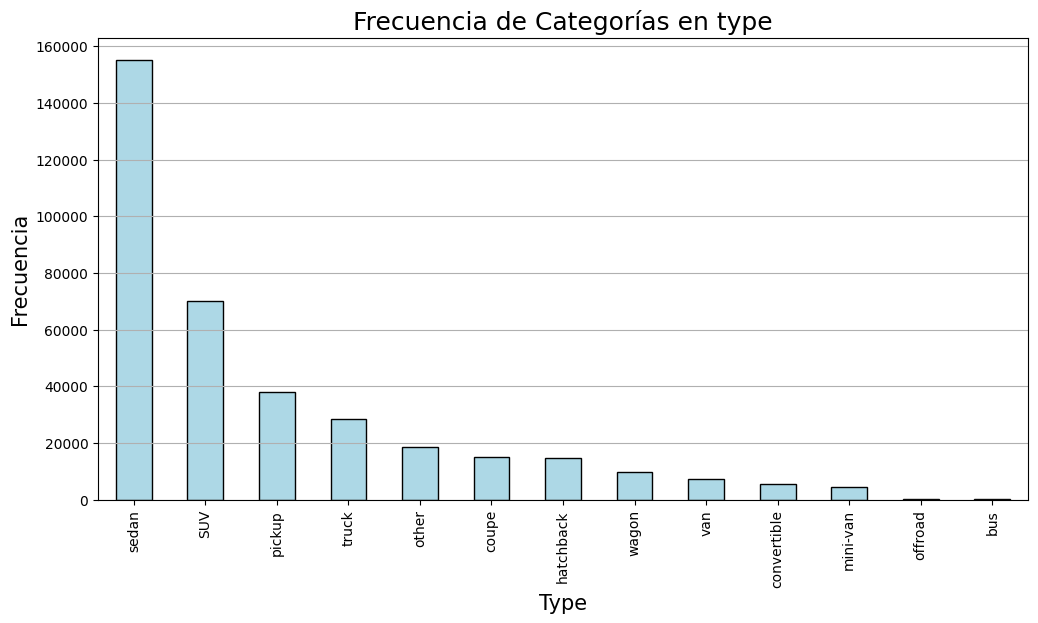

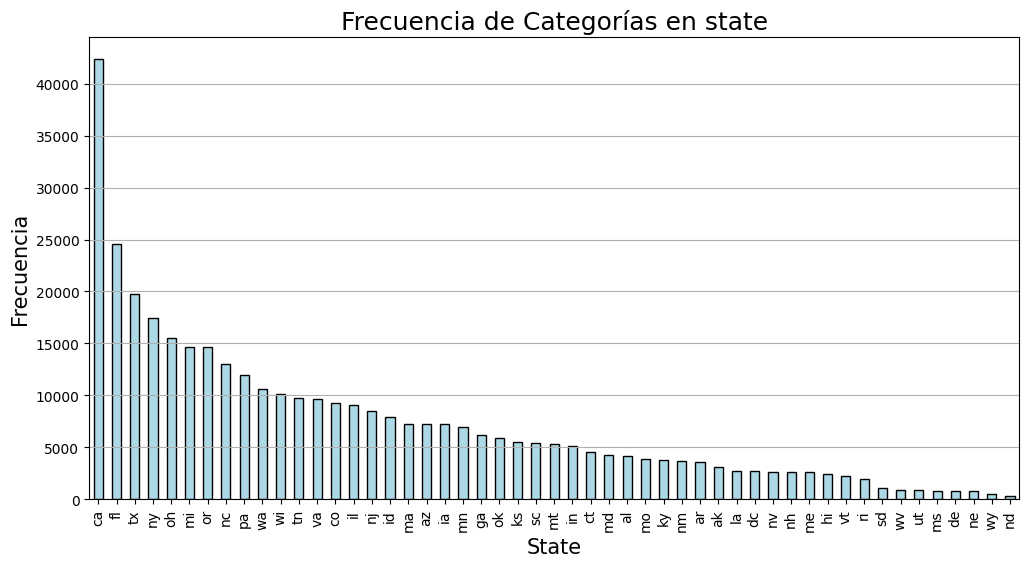

In [28]:
# Visualizar en gráficos de barras la frecuencia de las categorías para las variables con baja cardinalidad
for variable in few_cardinal_variables:
    plt.figure(figsize=(12, 6))
    cars_df[variable].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Frecuencia de Categorías en {variable}', fontsize=18)
    plt.xlabel(variable.capitalize(), fontsize=15)
    plt.ylabel('Frecuencia', fontsize=15)
    plt.grid(axis='y')
    plt.show()

## 8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [29]:
# Aplica codificación one-hot a las variables en few_cardinal_variables, borrando la primera categoría (drop='first')
onehot_df = pd.get_dummies(cars_df, columns=few_cardinal_variables, drop_first=True)

# Mensaje de éxito
mensajeExito = """
<span style='color: green; font-size: 18px; font-weight: bold;'>Codificación one-hot correctamente aplicada para few_cardinal_variables.</span><br><br>
<span style='font-size: 18px;'>Se elimina con éxito la primera categoría</span><br><br>
<span style='font-size: 18px;'>Este es una muestra del DataFrame llamado onehot_df:</span><br><br>
"""
display(HTML(mensajeExito))

# Mostrar los primeros registros del DataFrame resultante
display(onehot_df.head())

,region,region_url,price,model,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,auburn,https://auburn.craigslist.org,33590,sierra 1500 crew cab slt,57923.0,10.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,auburn,https://auburn.craigslist.org,22590,silverado 1500,71229.0,14.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,auburn,https://auburn.craigslist.org,39590,silverado 1500 crew,19160.0,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,auburn,https://auburn.craigslist.org,30990,tundra double cab sr,41124.0,7.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,auburn,https://auburn.craigslist.org,15000,f-150 xlt,128000.0,11.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.


In [30]:
# Aplica codificación binaria a las variables en highly_cardinal_variables
encoder = BinaryEncoder(cols=highly_cardinal_variables)
binary_df = encoder.fit_transform(cars_df)

# Mensaje de éxito
mensajeExito = """
<span style='color: green; font-size: 18px; font-weight: bold;'>Codificación binaria correctamente aplicada para highly_cardinal_variables.</span><br><br>
<span style='font-size: 18px;'>Este es una muestra del DataFrame llamado binary_df:</span><br><br>
"""
display(HTML(mensajeExito))

# Mostrar los primeros registros del DataFrame resultante
display(binary_df.head())

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_12,model_13,model_14,fuel,odometer,title_status,transmission,type,state,age
27,0,0,0,0,0,0,0,0,1,0,...,0,0,1,gas,57923.0,clean,other,pickup,al,10.0
28,0,0,0,0,0,0,0,0,1,0,...,0,1,0,gas,71229.0,clean,other,pickup,al,14.0
29,0,0,0,0,0,0,0,0,1,0,...,0,1,1,gas,19160.0,clean,other,pickup,al,4.0
30,0,0,0,0,0,0,0,0,1,0,...,1,0,0,gas,41124.0,clean,other,pickup,al,7.0
31,0,0,0,0,0,0,0,0,1,0,...,1,0,1,gas,128000.0,clean,automatic,truck,al,11.0


## 10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [31]:
# Asegurar que los índices coincidan antes de concatenar
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

# Concatenar los dataframes
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Mostrar los primeros registros del DataFrame concatenado
mensajeExito = """
<span style='color: green; font-size: 18px; font-weight: bold;'>Los DataFrames se han concatenado correctamente.</span><br><br>
<span style='font-size: 18px;'>Este es una muestra del DataFrame final llamado final_df:</span><br><br>
"""
display(HTML(mensajeExito))
display(final_df.head())

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,...,model_12,model_13,model_14,fuel,odometer,title_status,transmission,type,state,age
0,auburn,https://auburn.craigslist.org,0.794413,gmc,sierra 1500 crew cab slt,gas,0.435888,clean,other,pickup,...,0,0,1,gas,57923.0,clean,other,pickup,al,10.0
1,auburn,https://auburn.craigslist.org,0.669900,chevrolet,silverado 1500,gas,0.486465,clean,other,pickup,...,0,1,0,gas,71229.0,clean,other,pickup,al,14.0
2,auburn,https://auburn.craigslist.org,0.852455,chevrolet,silverado 1500 crew,gas,0.242097,clean,other,pickup,...,0,1,1,gas,19160.0,clean,other,pickup,al,4.0
3,auburn,https://auburn.craigslist.org,0.767405,toyota,tundra double cab sr,gas,0.363384,clean,other,pickup,...,1,0,0,gas,41124.0,clean,other,pickup,al,7.0
4,auburn,https://auburn.craigslist.org,0.561575,ford,f-150 xlt,gas,0.663928,clean,automatic,truck,...,1,0,1,gas,128000.0,clean,automatic,truck,al,11.0
